<a href="https://colab.research.google.com/github/mikechase3/ML_housingPriceCAPricePredition/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Data Automatically
We're going to use a script to get the data.

In [6]:
from pathlib import Path
import tarfile
import urllib.request
import pandas as pd


def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():  # if we don't have it locally, download it.
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("datasets/housing/housing.csv")
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)  # represents all cols except the median_house_value (Drop/inversed all cols)
y = data['median_house_value']  # represents only the median house value col.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print("done")

done


In [14]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6375,-117.58,33.87,34.0,1511.0,272.0,773.0,265.0,3.5313,INLAND,142100.0
680,-122.39,37.60,44.0,2304.0,384.0,986.0,379.0,4.6520,NEAR OCEAN,387100.0
2217,-117.79,33.69,15.0,1875.0,316.0,890.0,316.0,6.5783,<1H OCEAN,244800.0
13929,-118.06,33.97,37.0,1645.0,308.0,1077.0,320.0,4.3203,<1H OCEAN,159200.0
17752,-118.33,34.02,11.0,1249.0,313.0,625.0,336.0,0.8702,<1H OCEAN,170500.0
...,...,...,...,...,...,...,...,...,...,...
956,-116.89,33.79,12.0,701.0,130.0,434.0,110.0,2.0577,INLAND,56700.0
6853,-121.94,36.55,30.0,2722.0,584.0,628.0,384.0,3.4048,NEAR OCEAN,487100.0
18197,-118.30,34.01,35.0,1147.0,290.0,818.0,281.0,1.7961,<1H OCEAN,111700.0
13239,-118.35,33.99,48.0,2741.0,439.0,1115.0,459.0,5.0514,<1H OCEAN,269100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

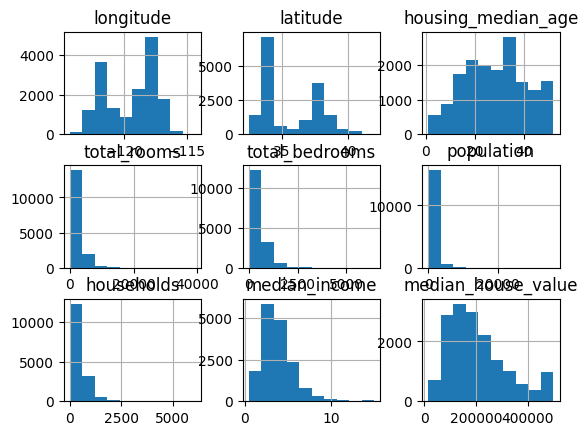

In [15]:
train_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

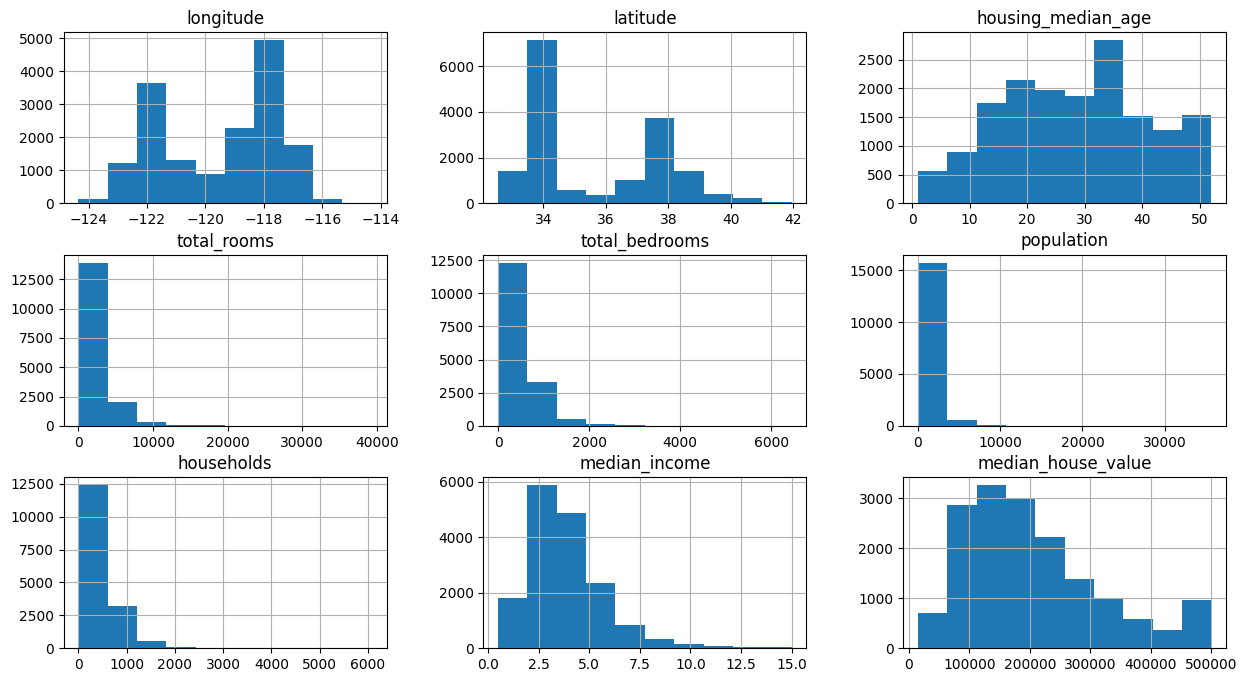

In [16]:
train_data.hist(figsize=(15, 8))

In [17]:
print(type(train_data))
# train_data
correlation_mat = train_data.drop('ocean_proximity', axis=1).corr()
# train_data.corr()
correlation_mat.corr()

<class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.983832,-0.191067,0.153411,0.179079,0.216957,0.174526,-0.014758,-0.011857
latitude,-0.983832,1.000000,0.116835,-0.110850,-0.126667,-0.161571,-0.125396,-0.102158,-0.145300
housing_median_age,-0.191067,0.116835,1.000000,-0.802617,-0.751591,-0.741090,-0.746293,-0.124284,0.097884
total_rooms,0.153411,-0.110850,-0.802617,1.000000,0.987261,0.976529,0.987653,-0.100250,-0.188881
total_bedrooms,0.179079,-0.126667,-0.751591,0.987261,1.000000,0.990246,0.999415,-0.240542,-0.290904
population,0.216957,-0.161571,-0.741090,0.976529,0.990246,1.000000,0.992205,-0.256670,-0.325304
households,0.174526,-0.125396,-0.746293,0.987653,0.999415,0.992205,1.000000,-0.230433,-0.279803
median_income,-0.014758,-0.102158,-0.124284,-0.100250,-0.240542,-0.256670,-0.230433,1.000000,0.892997
median_house_value,-0.011857,-0.145300,0.097884,-0.188881,-0.290904,-0.325304,-0.279803,0.892997,1.000000


<Axes: >

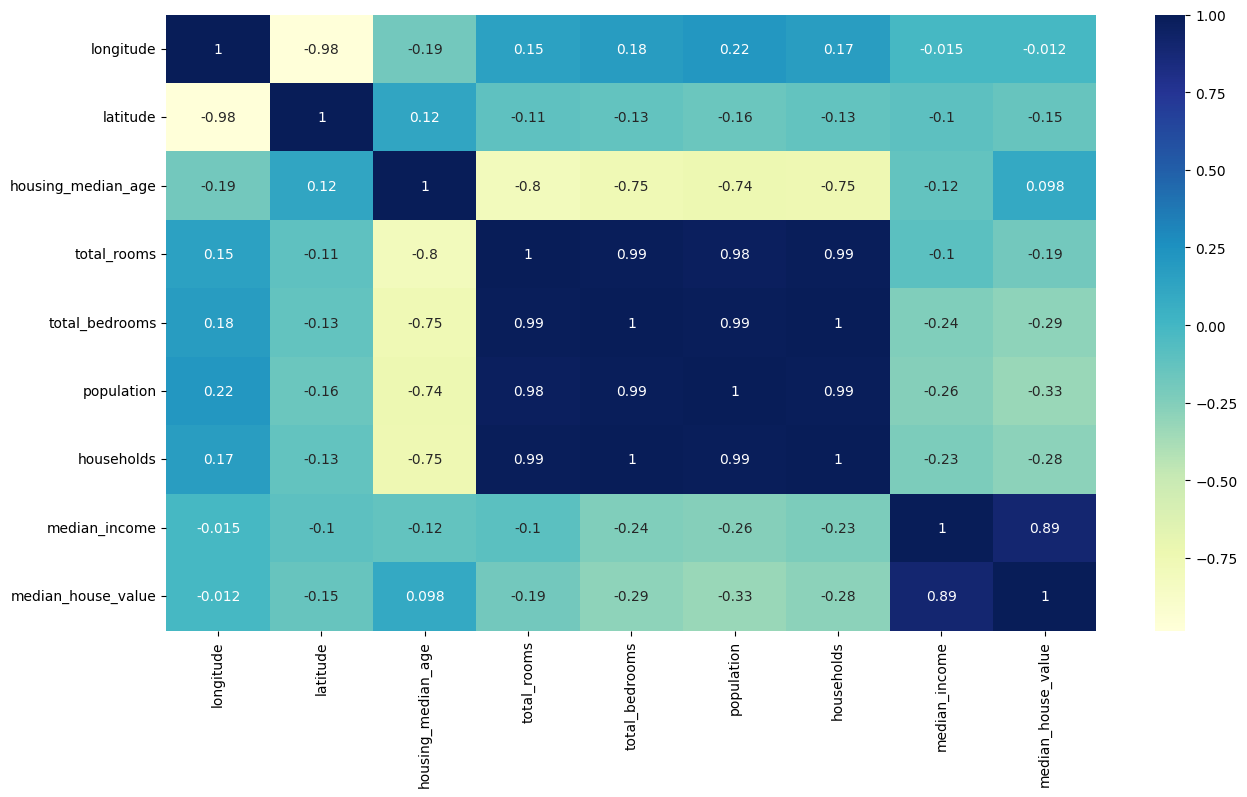

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_mat.corr(), annot=True, cmap="YlGnBu")  # Check for correlated variables! 1 means an exact correlated. 0.9 is closely correlated. -1 isn't

In [19]:
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


In [20]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set), len(test_set))
np.randomseed(42)

16512 4128
